<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18828 entries, 0 to 18827
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       18828 non-null  int32 
 1   1       18828 non-null  object
dtypes: int32(1), object(1)
memory usage: 220.8+ KB
None


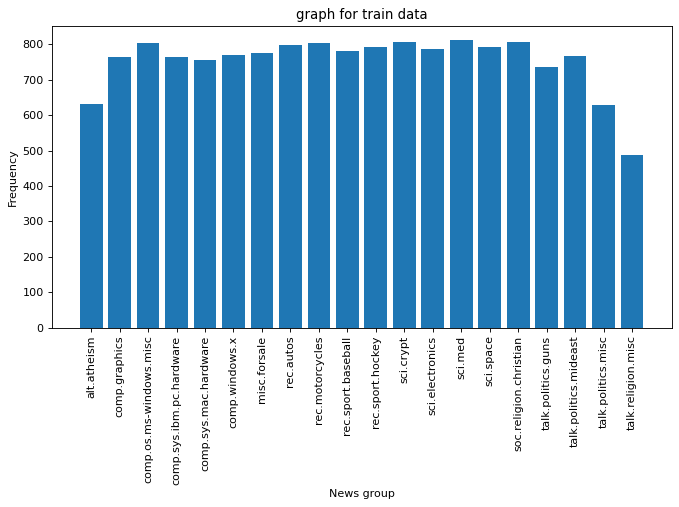

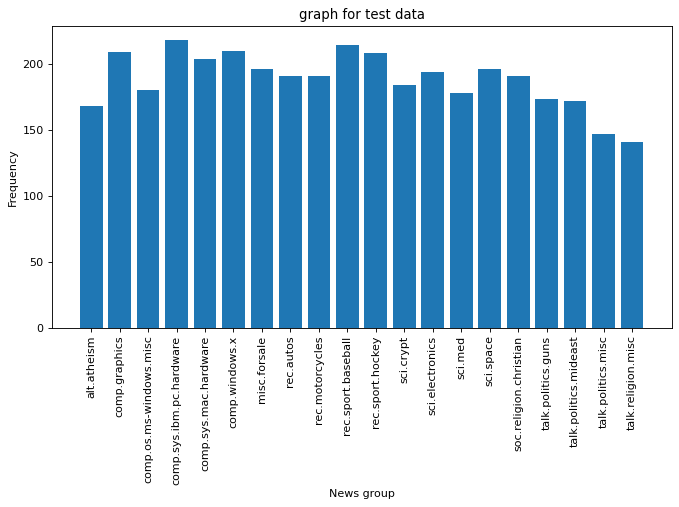

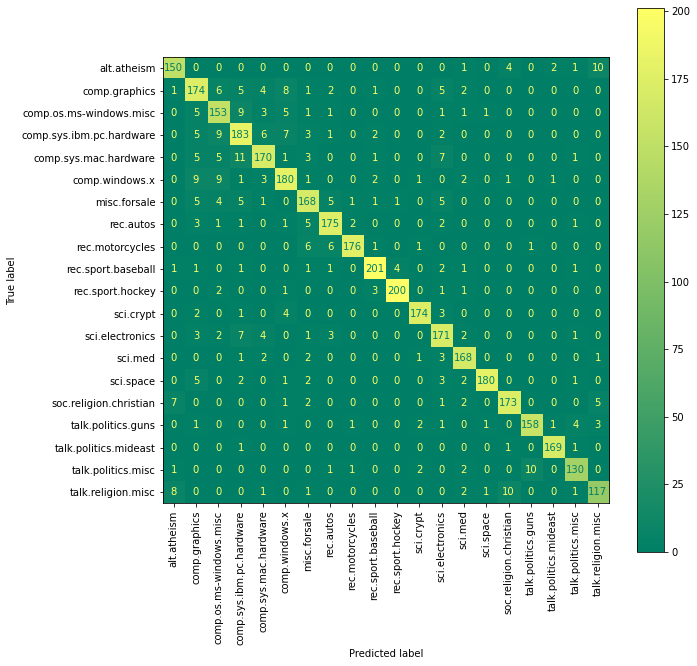

SVCModel Test Score is : 0.8950863213811421
SVCModel Train Score is : 0.9996016729735112


In [1]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import nltk
import string
import pickle
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from textblob import Word
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import load_files
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
# def checkstring(value):
#     for i in value:
#         if((i>='0' and i<='9') or (i in set(string.punctuation))):
#             return 0
#     return 1
# def cleaningdata(data):
#     text_tokens = word_tokenize(data.lower())
#     stp_word = ["''",'``',':','--','.','...']
#     tokens_without_sw = [word for word in text_tokens if not word in stopwords.words('english')]
#     tokens_without_sw = [word for word in tokens_without_sw if not word in set(string.punctuation)]
#     tokens_without_sw = [word for word in tokens_without_sw if not word in stp_word]
#     tokens_without_sw = [word for word in tokens_without_sw if not len(word) <= 2]
#     tokens_without_sw = [word for word in tokens_without_sw if checkstring(word) ]
#     tokens_without_sw = [Word(word).lemmatize() for word in tokens_without_sw]
#     return ' '.join(tokens_without_sw)
################################################
###################### read data from files ########################
# path = r'D:\FCIS\fcis3\second term\Natural Language Processing\20news-18828'

# categories = ['alt.atheism','comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware',
#                'comp.sys.mac.hardware','comp.windows.x','misc.forsale',
#                'rec.autos','rec.motorcycles','rec.sport.baseball','rec.sport.hockey','sci.crypt',
#                'sci.electronics','sci.med','sci.space','soc.religion.christian','talk.politics.guns'
#                ,'talk.politics.mideast','talk.politics.misc','talk.religion.misc']

# newsdata = load_files(path, description=None, categories=categories,
#                              load_content=True, shuffle=True, encoding='windows-1252', decode_error='strict', random_state=0)

######################pre_processing#################
####################### save data in file after pre_processing ######################
# cleaneddata=[]
# for data,target in zip(newsdata.data,newsdata.target):
#      cleaneddata.append([target,cleaningdata(data)]) 
# file = open('cleaneddata.pickle', 'wb')
# pickle.dump(cleaneddata, file)
# file.close()  
# file = open('targetnames.pickle', 'wb')
# pickle.dump(newsdata.target_names, file)
# file.close() 
####################### read data from file and split it to train and test ######################
#read data after clean it from file
cleaneddata = pd.read_pickle ('cleaneddata.pickle')
target_names = pd.read_pickle ('targetnames.pickle')
#split data to train and test with 80% train : 20% test
alldata=[]
targets =[]
for target,data in cleaneddata:
        alldata.append(data) 
        targets.append(target) 
x_train = []
y_train = []
x_test = []
y_test = []
x=0.0
length = len(targets)*(0.8)
for xdata,ydata in zip(alldata,targets):
    if(x>=length):
        x_test.append(xdata)
        y_test.append(ydata)
    else:
        x_train.append(xdata)
        y_train.append(ydata)
    x=x+1
#calculate frequency_train for tragets train data
categories,frequency_train = np.unique(y_train,return_counts=True)
#ploting graph for train data with it frequency of tragets 
figure = plt.figure(figsize=(10,5),dpi=80,facecolor='w',edgecolor='k')
plt.bar(target_names,frequency_train)
plt.xticks(rotation=90)
plt.title('graph for train data')
plt.xlabel('News group')
plt.ylabel('Frequency')
plt.show()
#calculate frequency_train for tragets test data
categories,frequency_train = np.unique(y_test,return_counts=True)
#ploting graph for test data with it frequency of tragets 
figure = plt.figure(figsize=(10,5),dpi=80,facecolor='w',edgecolor='k')
plt.bar(target_names,frequency_train)
plt.xticks(rotation=90)
plt.title('graph for test data')
plt.xlabel('News group')
plt.ylabel('Frequency')
plt.show()
# #####################Extracting features from text files########################
#note : use it if there is different tasks # 
count_vect = CountVectorizer()
#calculates the number of occurrences of each word
X_train_counts = count_vect.fit_transform(x_train)
# used to count the TF-IDF value of each word in the vectorizer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tfidf = tf_transformer.transform(X_train_counts)

# ####################### training data using classifier############
#Classifier
#support vector machine  ===>  note : vary vary slow #
# clf = SVC(C=1000,kernel='rbf',gamma = 0.1).fit(X_train_tfidf, y_train)
# file = open('model.pickle', 'wb')
# pickle.dump(clf,file)
# file.close()
###################### testing data ################
file = open('model.pickle', 'rb')
classifier = pickle.load(file)
file.close()
X_test_counts = count_vect.transform(x_test)
X_test_tfidf = tf_transformer.transform(X_test_counts)
prediction1 = classifier.predict(X_test_tfidf)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,prediction1),display_labels=target_names)
fig,ax=plt.subplots(figsize=(10,10))
disp.plot(xticks_rotation='vertical',ax=ax,cmap='summer')
plt.show()
print('SVCModel Test Score is :' ,np.mean(prediction1 == y_test))
prediction2 = classifier.predict(X_train_tfidf)
print('SVCModel Train Score is :' ,np.mean(prediction2 == y_train))